In [1]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [2]:
Il, Ir, I0 = symbols("I_{l} I_{r} I0", real=True)
Ml, Cl = symbols("M_{l} C_{l}", positive=True)
Mr, Cr = symbols("M_{r} C_{r}", positive=True)
R0, Rload, Rg, L0, С0 = symbols("R0 R_{load} R_{g} L0 С0", positive=True)
omega, omega0, omegal, omegar = symbols("\\omega \\omega_{0} \\omega_{l} \\omega_{r}", positive=True)
Csum0, Csuml, Csumr = symbols("C_{\\Sigma0} C_{{\\Sigma}l} C_{{\\Sigma}r}", positive=True)
Q0, Ql, Qr, Ll, Lr, Rl, Rr = symbols("Q0 Q_{l} Q_{r} L_{l} L_{r} R_{l} R_{r}", positive=True)
chig, chiload = symbols("\\chi_{g} \\chi_{load}", positive=True)
Kel, Ker, Khl, Khr = symbols("K^{e}_{l} K^{e}_{r} K^{h}_{l} K^{h}_{r}", positive=True)
f, f0, fl, fr = symbols("f f0 f_{l} f_{r}", positive=True)
Xl, Xr, X0 = symbols("X_{l} X_{r} X0", real=True)
Pg, phi = symbols("P_{g} \\varphi", positive=True)
U, Up, Z0, Z0n = symbols("U U_P Z0 Z^{N}_{0}", real=True)

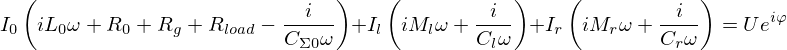

In [3]:
equation = Eq((I*omega*Ml - 1/(I*omega*Cl))*Il+(R0+Rload+Rg+I*omega*L0+1/(I*omega*Csum0))*I0+(I*omega*Mr - 1/(I*omega*Cr))*Ir, U*exp(I*phi)) #+Up)
equation

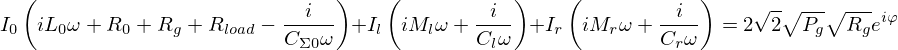

In [4]:
substitute = {U: 2*sqrt(2*Pg*Rg)}
equation = equation.subs(substitute)
equation

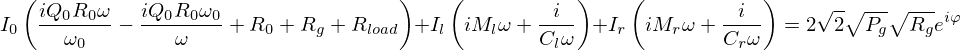

In [5]:
substitute = solve(Eq(Q0,omega0*L0/R0),L0,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Q0,1/(omega0*Csum0*R0)),Csum0,dict=1)[0]
equation = equation.subs(substitute)
equation

In [6]:
substitute = solve(Eq(chig,Rg/R0),Rg,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(chiload,Rload/R0),Rload,dict=1)[0]
equation = equation.subs(substitute)
equation

In [7]:
substitute = solve(Eq(Khl,2*Ml/sqrt(L0*Ll)),Ml,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Khr,2*Mr/sqrt(L0*Lr)),Mr,dict=1)[0]
equation = equation.subs(substitute)
equation

In [8]:
substitute = solve(Eq(Kel,2*sqrt(Csum0*Csuml)/Cl),Cl,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Ker,2*sqrt(Csum0*Csumr)/Cr),Cr,dict=1)[0]
equation = equation.subs(substitute)
equation

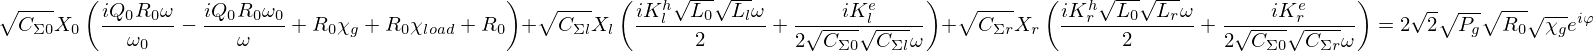

In [9]:
substitute = {Il: sqrt(Csuml)*Xl}
equation = equation.subs(substitute)
substitute = {Ir: Xr*sqrt(Csumr)}
equation = equation.subs(substitute)
substitute = {I0: X0*sqrt(Csum0)}
equation = equation.subs(substitute)
equation

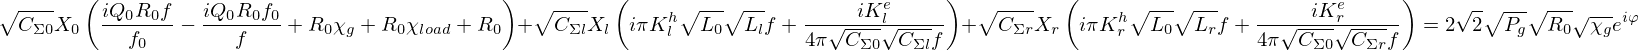

In [10]:
substitute = {omega: 2*pi*f}
equation = equation.subs(substitute)
substitute = {omegar: 2*pi*fr}
equation = equation.subs(substitute)
substitute = {omegal: 2*pi*fl}
equation = equation.subs(substitute)
substitute = {omega0: 2*pi*f0}
equation = equation.subs(substitute)
equation

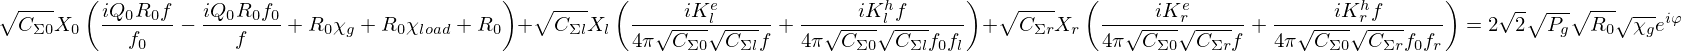

In [11]:
substitute = solve(Eq(1/(2*pi*sqrt(L0)*sqrt(Csum0)), f0), L0, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Ll)*sqrt(Csuml)), fl), Ll, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Lr)*sqrt(Csumr)), fr), Lr, dict=1)[0]
equation = equation.subs(substitute)
equation

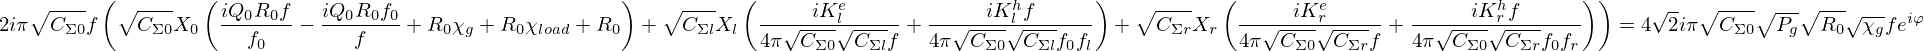

In [12]:
substitute = sqrt(Csum0)*2*pi*f*I
equation = Eq(equation.lhs*substitute, equation.rhs*substitute)
equation

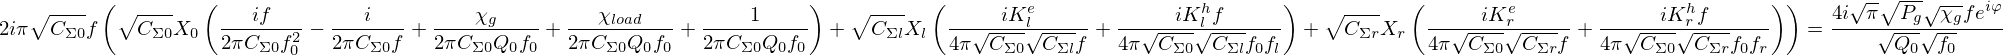

In [13]:
substitute = solve(Eq(Q0,1/(2*pi*f0*Csum0*R0)),R0,dict=1)[0]
equation = equation.subs(substitute)
equation

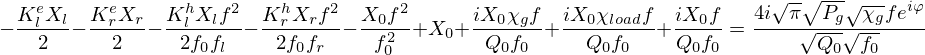

In [14]:
equation = expand(equation)
equation

# Ввод мощности

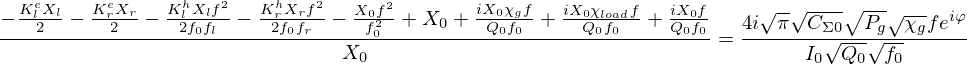

In [15]:
substitute = Eq(X0, I0/sqrt(Csum0))
equation = Eq(equation.lhs/substitute.lhs, equation.rhs/substitute.rhs)
equation

In [16]:
substitute = solve(Eq(Q0,1/(2*pi*f0*Csum0*R0)),Csum0,dict=1)[0]
equation = equation.subs(substitute)
equation

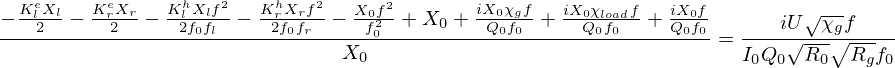

In [17]:
substitute = Eq(U,exp(I*phi)*sqrt(8*Rg*Pg))
equation = Eq(equation.lhs, equation.rhs*substitute.lhs/substitute.rhs)
equation

In [18]:
substitute = {chig: Rg/R0}
equation = Eq(equation.lhs, equation.rhs.subs(substitute))
equation

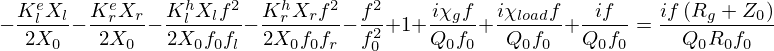

In [19]:
substitute = {U: I0*(Z0+Rg)}
equation = equation.subs(substitute)
equation = Eq(expand(equation.lhs), equation.rhs)
equation

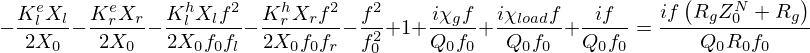

In [20]:
substitute = solve(Eq(Z0n,Z0/Rg),Z0,dict=1)[0]
equation = equation.subs(substitute)
equation

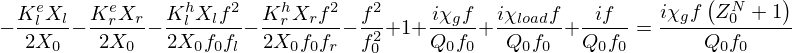

In [21]:
substitute = solve(Eq(chig,Rg/R0),Rg,dict=1)[0]
equation = equation.subs(substitute)
equation = Eq(equation.lhs, simplify(equation.rhs))
equation

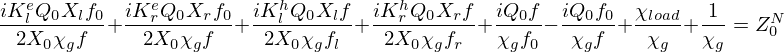

In [22]:
substutute = I*chig*f/Q0/f0
equation = Eq(equation.lhs/substutute,equation.rhs/substutute)
substutute = 1
equation = Eq(equation.lhs-substutute,equation.rhs-substutute)
equation = expand(equation)
equation